<a href="https://colab.research.google.com/github/nRknpy/lab-work/blob/main/oficial_ViT_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datasets import load_dataset

ds = load_dataset('beans')
ds

/home/rkn/.local/share/virtualenvs/lab-work-gFKfzxI5/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset beans (/home/rkn/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)
100%|██████████| 3/3 [00:00<00:00, 15.80it/s]


DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [2]:
ex = ds['train'][400]
ex

{'image_file_path': '/home/rkn/.cache/huggingface/datasets/downloads/extracted/e9ac27adae85378d1dcee4f2ba6574cb419451cfd3597cfb5eb8b277d9f4a3bd/train/bean_rust/bean_rust_train.148.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 1}

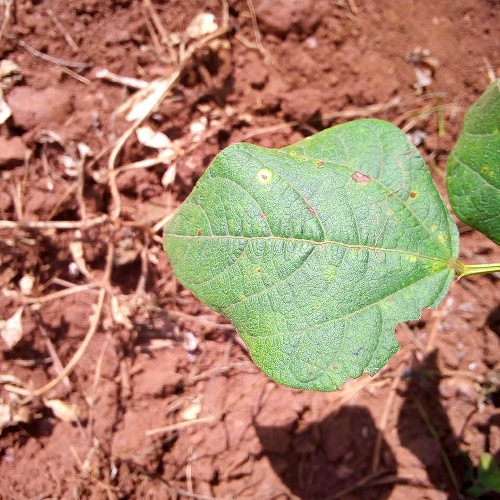

In [3]:
image = ex['image']
image

In [4]:
labels = ds['train'].features['labels']
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [5]:
labels.int2str(ex['labels'])

'bean_rust'

Loading cached processed dataset at /home/rkn/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-590f8e7b7d76530f.arrow
Loading cached processed dataset at /home/rkn/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-ac0b7da6898e835c.arrow
Loading cached processed dataset at /home/rkn/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-10836a8080277f52.arrow


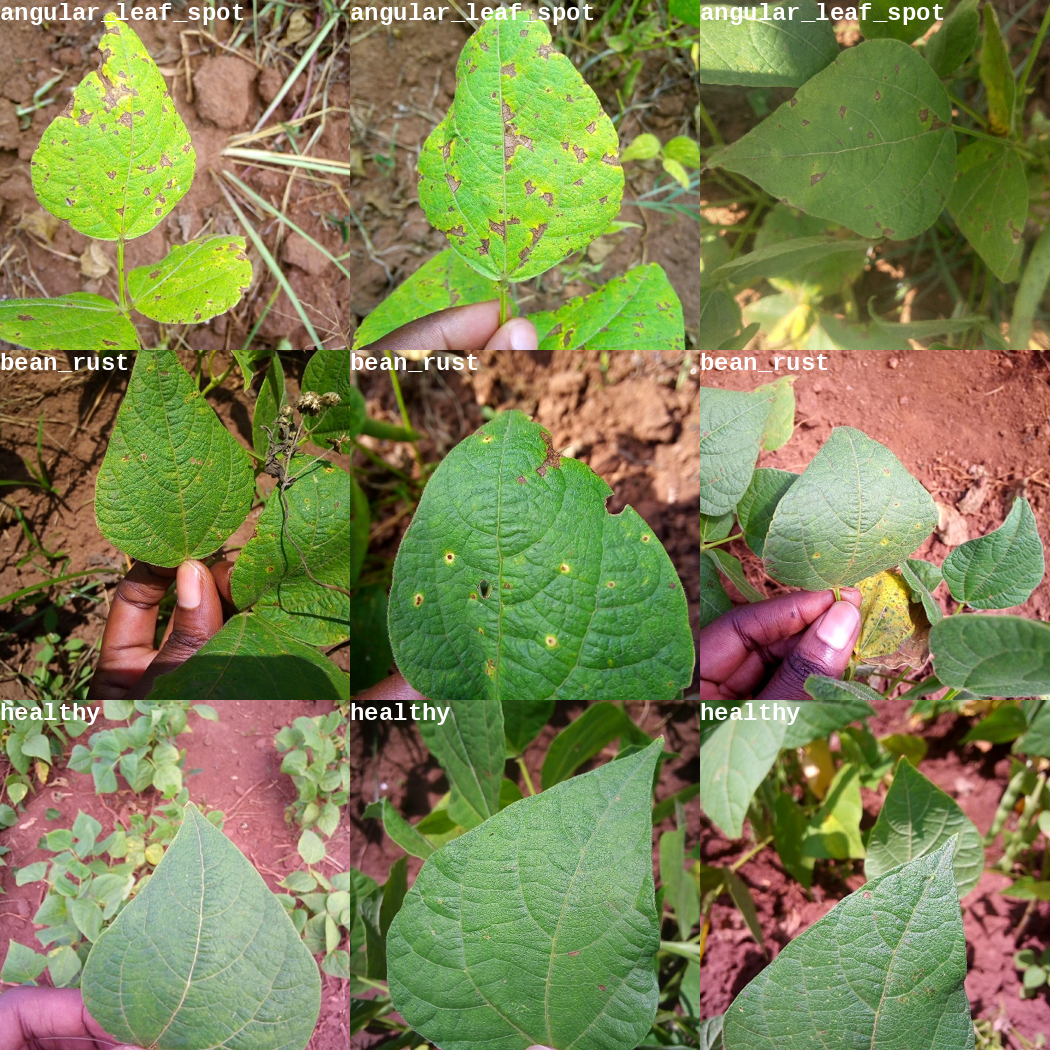

In [6]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)


In [7]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)


In [8]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.7882,  0.6706,  0.7098,  ..., -0.1922, -0.1294, -0.1765],
          [ 0.7098,  0.6000,  0.6784,  ..., -0.2863, -0.1608, -0.1608],
          [ 0.4902,  0.3882,  0.4667,  ..., -0.1922, -0.0196,  0.0275],
          ...,
          [ 0.3804,  0.5294,  0.4824,  ..., -0.8275, -0.8196, -0.8039],
          [ 0.0902,  0.3725,  0.3804,  ..., -0.8667, -0.8431, -0.8510],
          [-0.0510,  0.2784,  0.3176,  ..., -0.8588, -0.8275, -0.8353]],

         [[ 0.4902,  0.3490,  0.3804,  ..., -0.6078, -0.5373, -0.5843],
          [ 0.3569,  0.2000,  0.3176,  ..., -0.7255, -0.6000, -0.5922],
          [ 0.0431, -0.0902,  0.0588,  ..., -0.6392, -0.4745, -0.4275],
          ...,
          [-0.2235, -0.0510, -0.0902,  ..., -0.9686, -0.9529, -0.9294],
          [-0.5059, -0.2078, -0.1922,  ..., -0.9922, -0.9922, -1.0000],
          [-0.6471, -0.2941, -0.2471,  ..., -0.9843, -0.9765, -0.9843]],

         [[ 0.4196,  0.2706,  0.3020,  ..., -0.7098, -0.6392, -0.6863],
          [ 0

In [9]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [10]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1843, -0.2471],
          [-0.6078, -0.6000, -0.5765,  ..., -0.0353, -0.0196, -0.2627],
          [-0.6314, -0.6314, -0.6078,  ..., -0.2314, -0.3647, -0.2235],
          ...,
          [-0.5373, -0.5529, -0.5843,  ..., -0.0824, -0.0431, -0.0902],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3098,  0.1843,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2627,  0.1608,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3647, -0.3255, -0.5686],
          [-0.7490, -0.7490, -0.7725,  ..., -0.5373, -0.6549, -0.5373],
          ...,
          [-0.7725, -0.7804, -0.8196,  ..., -0.2235, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1922,  0.3098,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0824,  0.2784,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3569, -0.7255],
          [-0

In [11]:
ds = load_dataset('beans')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs


Found cached dataset beans (/home/rkn/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)
100%|██████████| 3/3 [00:00<00:00, 760.66it/s]


In [12]:
prepared_ds = ds.with_transform(transform)


In [13]:
prepared_ds['train'][0:2]


{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1843, -0.2471],
          [-0.6078, -0.6000, -0.5765,  ..., -0.0353, -0.0196, -0.2627],
          [-0.6314, -0.6314, -0.6078,  ..., -0.2314, -0.3647, -0.2235],
          ...,
          [-0.5373, -0.5529, -0.5843,  ..., -0.0824, -0.0431, -0.0902],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3098,  0.1843,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2627,  0.1608,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3647, -0.3255, -0.5686],
          [-0.7490, -0.7490, -0.7725,  ..., -0.5373, -0.6549, -0.5373],
          ...,
          [-0.7725, -0.7804, -0.8196,  ..., -0.2235, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1922,  0.3098,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0824,  0.2784,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3569, -0.7255],
          [-0

In [14]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }


In [15]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


/tmp/ipykernel_18700/311509507.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [16]:
from transformers import ViTForImageClassification

labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [18]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)


Using cuda_amp half precision backend


In [19]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


/home/rkn/.local/share/virtualenvs/lab-work-gFKfzxI5/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1034
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 260
  Number of trainable parameters = 85800963
  4%|▍         | 10/260 [00:21<02:52,  1.45it/s] 

{'loss': 0.8831, 'learning_rate': 0.00019230769230769233, 'epoch': 0.15}


  8%|▊         | 20/260 [00:26<01:56,  2.07it/s]

{'loss': 0.3975, 'learning_rate': 0.00018461538461538463, 'epoch': 0.31}


 12%|█▏        | 30/260 [00:30<01:52,  2.04it/s]

{'loss': 0.2933, 'learning_rate': 0.00017692307692307693, 'epoch': 0.46}


 15%|█▌        | 40/260 [00:35<01:45,  2.09it/s]

{'loss': 0.1473, 'learning_rate': 0.00016923076923076923, 'epoch': 0.62}


 19%|█▉        | 50/260 [00:40<01:37,  2.16it/s]

{'loss': 0.3716, 'learning_rate': 0.00016153846153846155, 'epoch': 0.77}


 23%|██▎       | 60/260 [00:45<01:37,  2.05it/s]

{'loss': 0.1662, 'learning_rate': 0.00015384615384615385, 'epoch': 0.92}


 27%|██▋       | 70/260 [00:49<01:15,  2.51it/s]

{'loss': 0.1263, 'learning_rate': 0.00014615384615384615, 'epoch': 1.08}


 31%|███       | 80/260 [00:53<01:09,  2.61it/s]

{'loss': 0.0825, 'learning_rate': 0.00013846153846153847, 'epoch': 1.23}


 35%|███▍      | 90/260 [00:57<01:04,  2.63it/s]

{'loss': 0.0624, 'learning_rate': 0.00013076923076923077, 'epoch': 1.38}


 38%|███▊      | 100/260 [01:00<01:00,  2.63it/s]***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


{'loss': 0.1206, 'learning_rate': 0.0001230769230769231, 'epoch': 1.54}


                                                 
 38%|███▊      | 100/260 [01:03<01:00,  2.63it/s]Saving model checkpoint to ./vit-base-beans/checkpoint-100
Configuration saved in ./vit-base-beans/checkpoint-100/config.json


{'eval_loss': 0.21055875718593597, 'eval_accuracy': 0.9172932330827067, 'eval_runtime': 2.1157, 'eval_samples_per_second': 62.863, 'eval_steps_per_second': 8.035, 'epoch': 1.54}


Model weights saved in ./vit-base-beans/checkpoint-100/pytorch_model.bin
Image processor saved in ./vit-base-beans/checkpoint-100/preprocessor_config.json
 42%|████▏     | 110/260 [01:16<01:18,  1.91it/s]

{'loss': 0.1895, 'learning_rate': 0.00011538461538461538, 'epoch': 1.69}


 46%|████▌     | 120/260 [01:20<00:55,  2.54it/s]

{'loss': 0.1432, 'learning_rate': 0.0001076923076923077, 'epoch': 1.85}


 50%|█████     | 130/260 [01:24<00:45,  2.87it/s]

{'loss': 0.1291, 'learning_rate': 0.0001, 'epoch': 2.0}


 54%|█████▍    | 140/260 [01:28<00:45,  2.61it/s]

{'loss': 0.0284, 'learning_rate': 9.230769230769232e-05, 'epoch': 2.15}


 58%|█████▊    | 150/260 [01:32<00:42,  2.61it/s]

{'loss': 0.0198, 'learning_rate': 8.461538461538461e-05, 'epoch': 2.31}


 62%|██████▏   | 160/260 [01:35<00:38,  2.61it/s]

{'loss': 0.0223, 'learning_rate': 7.692307692307693e-05, 'epoch': 2.46}


 65%|██████▌   | 170/260 [01:39<00:34,  2.60it/s]

{'loss': 0.0388, 'learning_rate': 6.923076923076924e-05, 'epoch': 2.62}


 69%|██████▉   | 180/260 [01:43<00:30,  2.64it/s]

{'loss': 0.0434, 'learning_rate': 6.153846153846155e-05, 'epoch': 2.77}


 73%|███████▎  | 190/260 [01:47<00:26,  2.63it/s]

{'loss': 0.0195, 'learning_rate': 5.384615384615385e-05, 'epoch': 2.92}


 77%|███████▋  | 200/260 [01:51<00:22,  2.69it/s]***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


{'loss': 0.0212, 'learning_rate': 4.615384615384616e-05, 'epoch': 3.08}


                                                 
 77%|███████▋  | 200/260 [01:52<00:22,  2.69it/s]Saving model checkpoint to ./vit-base-beans/checkpoint-200
Configuration saved in ./vit-base-beans/checkpoint-200/config.json


{'eval_loss': 0.020801858976483345, 'eval_accuracy': 0.9924812030075187, 'eval_runtime': 1.5785, 'eval_samples_per_second': 84.258, 'eval_steps_per_second': 10.77, 'epoch': 3.08}


Model weights saved in ./vit-base-beans/checkpoint-200/pytorch_model.bin
Image processor saved in ./vit-base-beans/checkpoint-200/preprocessor_config.json
 81%|████████  | 210/260 [02:05<00:25,  1.94it/s]

{'loss': 0.0127, 'learning_rate': 3.846153846153846e-05, 'epoch': 3.23}


 85%|████████▍ | 220/260 [02:09<00:15,  2.60it/s]

{'loss': 0.0124, 'learning_rate': 3.0769230769230774e-05, 'epoch': 3.38}


 88%|████████▊ | 230/260 [02:13<00:11,  2.62it/s]

{'loss': 0.0121, 'learning_rate': 2.307692307692308e-05, 'epoch': 3.54}


 92%|█████████▏| 240/260 [02:17<00:07,  2.62it/s]

{'loss': 0.0123, 'learning_rate': 1.5384615384615387e-05, 'epoch': 3.69}


 96%|█████████▌| 250/260 [02:21<00:03,  2.61it/s]

{'loss': 0.0118, 'learning_rate': 7.692307692307694e-06, 'epoch': 3.85}


100%|██████████| 260/260 [02:24<00:00,  2.90it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./vit-base-beans/checkpoint-200 (score: 0.020801858976483345).
100%|██████████| 260/260 [02:24<00:00,  1.79it/s]
Saving model checkpoint to ./vit-base-beans
Configuration saved in ./vit-base-beans/config.json


{'loss': 0.0118, 'learning_rate': 0.0, 'epoch': 4.0}
{'train_runtime': 144.9571, 'train_samples_per_second': 28.533, 'train_steps_per_second': 1.794, 'train_loss': 0.12996951745679744, 'epoch': 4.0}


Model weights saved in ./vit-base-beans/pytorch_model.bin
Image processor saved in ./vit-base-beans/preprocessor_config.json


***** train metrics *****
  epoch                    =        4.0
  train_loss               =       0.13
  train_runtime            = 0:02:24.95
  train_samples_per_second =     28.533
  train_steps_per_second   =      1.794


In [20]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)


***** Running Evaluation *****
  Num examples = 133
  Batch size = 8
100%|██████████| 17/17 [00:01<00:00, 11.74it/s]

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9925
  eval_loss               =     0.0208
  eval_runtime            = 0:00:01.55
  eval_samples_per_second =     85.774
  eval_steps_per_second   =     10.964


In [21]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'beans',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)
